<a href="https://colab.research.google.com/github/joannamooon/Learning-to-Machine-Learn/blob/main/Similarity_Between_Words_and_Sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install cohere -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
import cohere
import numpy as np
import seaborn as sns
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
co = cohere.Client("")

In [ ]:
texts = ["I like bananas", "bananas are my favorite fruit", "all hail king gru"]

In [ ]:
response = co.embed(
    texts = texts,
    model='embed-english-v3.0',
    input_type = 'search_document'
)

In [ ]:
embeddings = response.embeddings

[sentence1, sentence2, sentence3] = embeddings

print("Embedding for sentence 1", np.array(sentence1))
print("Embedding for sentence 2", np.array(sentence2))
print("Embedding for sentence 3", np.array(sentence3))

Embedding for sentence 1 [ 0.01756287  0.03323364 -0.03207397 ... -0.03659058 -0.01309204
 -0.00870514]
Embedding for sentence 2 [ 0.00919342  0.01419067 -0.02655029 ... -0.0221405  -0.01024628
  0.00216293]
Embedding for sentence 3 [ 0.03295898  0.00550461 -0.01107025 ... -0.02914429 -0.01647949
 -0.00933075]


In [ ]:
print("Similarity between sentences 1 and 2:", np.dot(sentence1, sentence2))
print("Similarity between sentences 1 and 3:", np.dot(sentence1, sentence3))
print("Similarity between sentences 2 and 3:", np.dot(sentence2, sentence3))

Similarity between sentences 1 and 2: 0.8661315760643093
Similarity between sentences 1 and 3: 0.41541269479574794
Similarity between sentences 2 and 3: 0.35046098501438705


In [ ]:
print("Similarity between sentences 1 and 1:", np.dot(sentence1, sentence1))
print("Similarity between sentences 2 and 2:", np.dot(sentence2, sentence2))
print("Similarity between sentences 3 and 3:", np.dot(sentence3, sentence3))

Similarity between sentences 1 and 1: 1.0002137888941132
Similarity between sentences 2 and 2: 1.000380798014188
Similarity between sentences 3 and 3: 1.000106821551554


In [ ]:
print("Cosine similarity between sentences 1 and 2:", cosine_similarity([sentence1], [sentence2])[0][0])
print("Cosine similarity between sentences 1 and 3:", cosine_similarity([sentence1], [sentence3])[0][0])
print("Cosine similarity between sentences 2 and 3:", cosine_similarity([sentence2], [sentence3])[0][0])

Cosine similarity between sentences 1 and 2: 0.8658741603622937
Cosine similarity between sentences 1 and 3: 0.4153461132384664
Cosine similarity between sentences 2 and 3: 0.3503755633111061


[Text(0.5, 0, 'I like bananas'),
 Text(1.5, 0, 'bananas are my favorite fruit'),
 Text(2.5, 0, 'all hail king gru')]

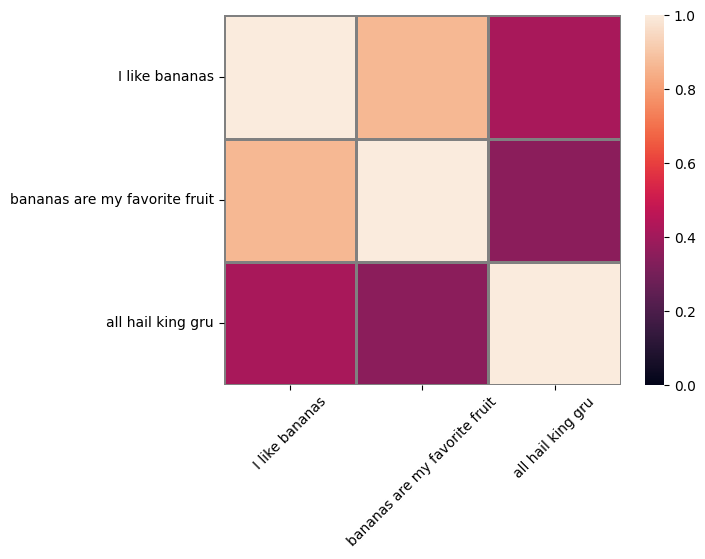

In [ ]:
# Get pairwise dot product similarities
dot_product_similarities = [[cosine_similarity([embeddings[i]], [embeddings[j]])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]

# Plot in 3x3 grid
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,
                 linewidths=1, linecolor='grey',
                 xticklabels=texts,
                 yticklabels=texts,
)
ax.set_xticklabels(labels=texts, rotation=45)